<a href="https://colab.research.google.com/github/Zwolfe01/PCA-for-Climate-Change-Data/blob/main/PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Imports

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

Importing & Exploring Data


In [ ]:
coldestday = pd.read_csv('/ColdestDay.csv')
hottestday = pd.read_csv('/Hottestday Annual Toronto.csv')
maxtemp = pd.read_csv('/MaxTempAnnual.csv')
meantemp = pd.read_csv('/MeanTemperature.csv')
mintemp = pd.read_csv('/MinTemperatureAnnual.csv')
totalrain = pd.read_csv('/Totalrain.csv')
daysover25 = pd.read_csv('/daysover25.csv')
daysover30 = pd.read_csv('/daysover30.csv')
daysover32 = pd.read_csv('/daysover32.csv')
daystminover22 = pd.read_csv('/daystminover22.csv')
daysunderneg15 = pd.read_csv('/daysunderneg15.csv')
firstfallfrost = pd.read_csv('/first_fall_frost.csv')
frostfreeseason = pd.read_csv('/frost_free_season.csv')
growthof5degrees = pd.read_csv('/gddgrow_5.csv')
lastspringfrost = pd.read_csv('/last_spring_frost.csv')
max1daytotalrain = pd.read_csv('/max1daytotalrain.csv')
max5dayrain = pd.read_csv('/max5dayrain.csv')
maxconsecdrydays = pd.read_csv('/maxconsecdrydays.csv')
periodsover5drydays = pd.read_csv('/numofperiodsover5drydays.csv')
rainover10mm = pd.read_csv('/rainover10mm.csv')
rainover1mm = pd.read_csv('/rainover1mm.csv')
rainover20mm = pd.read_csv('/rainover20mm.csv')

Merging Data

In [ ]:
climatedata1 = pd.merge(coldestday, hottestday, on='time')
climatedata2 = pd.merge(maxtemp, meantemp, on='time')
climatedata3 = pd.merge(mintemp, totalrain, on='time')
climatedata4 = pd.merge(daysover25, daysover30, on='time')
climatedata5 = pd.merge(daysover32, daystminover22, on='time')
climatedata6 = pd.merge(daysunderneg15, firstfallfrost, on='time')
climatedata7 = pd.merge(frostfreeseason, growthof5degrees, on='time')
climatedata8 = pd.merge(lastspringfrost, max1daytotalrain, on='time')
climatedata9 = pd.merge(max5dayrain, maxconsecdrydays, on='time')
climatedata10 = pd.merge(periodsover5drydays, rainover10mm, on='time')
climatedata11 = pd.merge(rainover1mm, rainover20mm, on='time')

In [ ]:
climatedata12 = pd.merge(climatedata1, climatedata2, on='time')
climatedata13 = pd.merge(climatedata3, climatedata4, on='time')
climatedata14 = pd.merge(climatedata5, climatedata6, on='time')
climatedata15 = pd.merge(climatedata7, climatedata8, on='time')
climatedata16 = pd.merge(climatedata9, climatedata10, on='time')

In [ ]:
climatedata18 = pd.merge(climatedata11, climatedata12, on='time')
climatedata19 = pd.merge(climatedata13, climatedata14, on='time')
climatedata20 = pd.merge(climatedata15, climatedata16, on='time')

In [ ]:
climatedata21 = pd.merge(climatedata18, climatedata19, on='time')
climatedata = pd.merge(climatedata21, climatedata20, on='time')

Exploring Data and Cleaning

In [ ]:
climatedata10

,time,lat_x,lon_x,ssp126_nr_cdd_p10,ssp126_nr_cdd_p50,ssp126_nr_cdd_p90,ssp245_nr_cdd_p10,ssp245_nr_cdd_p50,ssp245_nr_cdd_p90,ssp585_nr_cdd_p10,...,lon_y,ssp126_r10mm_p10,ssp126_r10mm_p50,ssp126_r10mm_p90,ssp245_r10mm_p10,ssp245_r10mm_p50,ssp245_r10mm_p90,ssp585_r10mm_p10,ssp585_r10mm_p50,ssp585_r10mm_p90
0,1950-01-01,43.708333,-79.375002,9.5,13.0,16.5,9.5,13.0,16.5,9.5,...,-79.375002,20.5,25.0,30.5,20.5,25.0,30.5,20.5,25.0,30.5
1,1951-01-01,43.708333,-79.375002,12.5,14.5,17.5,12.5,14.5,17.5,12.5,...,-79.375002,18.5,24.5,28.5,18.5,24.5,28.5,18.5,24.5,28.5
2,1952-01-01,43.708333,-79.375002,11.5,13.5,16.0,11.0,13.5,16.0,11.0,...,-79.375002,19.5,24.5,29.5,19.5,24.5,29.5,19.5,24.5,29.5
3,1953-01-01,43.708333,-79.375002,10.0,14.5,20.0,10.0,14.5,20.0,10.0,...,-79.375002,17.0,21.0,28.0,17.0,21.0,28.0,17.0,21.0,28.0
4,1954-01-01,43.708333,-79.375002,11.0,14.0,16.5,11.0,14.0,16.5,11.0,...,-79.375002,17.5,25.0,30.5,17.5,25.0,30.5,17.5,25.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2096-01-01,43.708333,-79.375002,10.5,13.5,17.5,9.5,13.0,17.5,10.5,...,-79.375002,19.5,25.0,34.5,22.5,28.5,37.0,24.5,29.0,35.5
147,2097-01-01,43.708333,-79.375002,11.5,14.0,17.0,11.0,14.0,15.5,10.5,...,-79.375002,22.0,29.0,34.5,21.5,28.0,35.0,24.0,31.5,36.5
148,2098-01-01,43.708333,-79.375002,10.0,14.0,16.0,10.0,14.0,18.5,10.5,...,-79.375002,19.0,26.0,32.0,24.5,28.0,30.0,24.0,29.0,34.0
149,2099-01-01,43.708333,-79.375002,10.5,13.0,16.0,11.5,14.0,17.0,11.0,...,-79.375002,19.0,25.5,36.0,22.0,26.5,31.0,22.0,32.5,38.5


In [ ]:
climatedata.shape
print("Column names:", climatedata.columns)

Column names: Index(['time', 'lat_x', 'lon_x', 'ssp126_r1mm_p10', 'ssp126_r1mm_p50',
       'ssp126_r1mm_p90', 'ssp245_r1mm_p10', 'ssp245_r1mm_p50',
       'ssp245_r1mm_p90', 'ssp585_r1mm_p10',
       ...
       'lon_y_y_y_y', 'ssp126_r10mm_p10', 'ssp126_r10mm_p50',
       'ssp126_r10mm_p90', 'ssp245_r10mm_p10', 'ssp245_r10mm_p50',
       'ssp245_r10mm_p90', 'ssp585_r10mm_p10', 'ssp585_r10mm_p50',
       'ssp585_r10mm_p90'],
      dtype='object', length=243)


In [ ]:
#Index all columns that are the 10th percentile or 90th percentile
columns_to_keep = [col for col in climatedata.columns if not col.endswith(('p10', 'p90'))]
#Filter out indexed columns
climatedata_averages = climatedata[columns_to_keep]

In [ ]:
#Index all columns that are latitude or logitude data as these remain constant
columns_to_keep1 = [col for col in climatedata_averages.columns if not col.startswith(('lat', 'lon'))]
#Filter out indexed columns
climatedata_nolatnolon = climatedata[columns_to_keep1]

In [ ]:
#Index all columns that are duplicates
columns_to_keep2 = [col for col in climatedata_nolatnolon.columns if not col.startswith(('ssp126', 'ssp245'))]
#Filter out indexed columns
climatedata_filtered = climatedata[columns_to_keep2]

In [ ]:
climatedata_filtered.columns

Index(['time', 'ssp585_r1mm_p50', 'ssp585_r20mm_p50', 'ssp585_tn_min_p50',
       'ssp585_tx_max_p50', 'ssp585_tx_mean_p50', 'ssp585_tg_mean_p50',
       'ssp585_tn_mean_p50', 'ssp585_prcptot_p50', 'ssp585_txgt_25_p50',
       'ssp585_txgt_30_p50', 'ssp585_txgt_32_p50', 'ssp585_tr_22_p50',
       'ssp585_tnlt_-15_p50', 'ssp585_first_fall_frost_p50',
       'ssp585_frost_free_season_p50', 'ssp585_gddgrow_5_p50',
       'ssp585_last_spring_frost_p50', 'ssp585_rx1day_p50',
       'ssp585_rx5day_p50', 'ssp585_cdd_p50', 'ssp585_nr_cdd_p50',
       'ssp585_r10mm_p50'],
      dtype='object')

In [ ]:
#rename columns
# Dictionary mapping old column names to new names
column_mapping = {
    'ssp585_r1mm_p50': 'rainover1mm',
    'ssp585_r20mm_p50': 'rainover20mm',
    'ssp585_tn_min_p50': 'coldestday',
    'ssp585_tx_max_p50': 'hottestday',
    'ssp585_tx_mean_p50': 'maxtemp',
    'ssp585_tg_mean_p50': 'meantemp',
    'ssp585_tn_mean_p50': 'mintemp',
    'ssp585_prcptot_p50': 'totalrain',
    'ssp585_txgt_25_p50': 'daysover25',
    'ssp585_txgt_30_p50': 'daysover30',
    'ssp585_txgt_32_p50': 'daysover32',
    'ssp585_tr_22_p50': 'daystminover22',
    'ssp585_tnlt_-15_p50': 'daysunderneg15',
    'ssp585_first_fall_frost_p50': 'firstfallfrost',
    'ssp585_frost_free_season_p50': 'frostfreeseason',
    'ssp585_gddgrow_5_p50': 'growthof5degrees',
    'ssp585_last_spring_frost_p50': 'lastspringfrost',
    'ssp585_rx1day_p50': 'max1daytotalrain',
    'ssp585_rx5day_p50': 'max5daytotalrain',
    'ssp585_cdd_p50': 'maxconsecdrydays',
    'ssp585_nr_cdd_p50': 'periodsover5drydays',
    'ssp585_r10mm_p50': 'rainover10mm'
}

# Rename columns using the mapping dictionary
# Create a copy of the DataFrame
climatedata_filtered = climatedata_filtered.copy()

# Rename columns using the mapping dictionary
climatedata_filtered.rename(columns=column_mapping, inplace=True)

In [ ]:
climatedata_filtered.head()

,time,rainover1mm,rainover20mm,coldestday,hottestday,maxtemp,meantemp,mintemp,totalrain,daysover25,...,daysunderneg15,firstfallfrost,frostfreeseason,growthof5degrees,lastspringfrost,max1daytotalrain,max5daytotalrain,maxconsecdrydays,periodsover5drydays,rainover10mm
0,1950-01-01,117.5,6.0,-21.88,32.82,12.51,8.18,3.80,794.55,54.0,...,13.5,297.5,184.0,2241.0,107.5,39.47,67.88,17.5,13.0,25.0
1,1951-01-01,113.5,6.0,-21.96,32.94,12.57,8.28,3.95,780.52,54.5,...,13.0,296.5,186.0,2218.0,110.0,38.18,60.27,16.0,14.5,24.5
2,1952-01-01,113.0,6.0,-22.34,33.36,12.42,8.03,3.52,774.27,55.5,...,13.5,301.0,191.0,2255.5,108.0,40.89,65.22,16.5,13.5,24.5
3,1953-01-01,114.0,5.0,-22.43,32.86,12.10,7.84,3.63,724.89,55.5,...,13.0,295.5,177.0,2199.0,111.5,35.31,59.67,15.0,14.5,21.0
4,1954-01-01,117.5,5.0,-21.81,32.70,12.01,7.66,3.48,765.11,51.0,...,13.0,296.0,184.5,2186.5,109.5,35.84,67.79,15.0,14.0,25.0


In [ ]:
# Specify the year to filter
year_threshold = 2023
climatedata_filtered['time'] = pd.to_datetime(climatedata_filtered['time'])

# Filter rows based on the year
climatedata_filtered = climatedata_filtered[climatedata_filtered['time'].dt.year <= year_threshold]

In [ ]:
climatedata_filtered.head(75)

,time,rainover1mm,rainover20mm,coldestday,hottestday,maxtemp,meantemp,mintemp,totalrain,daysover25,...,daysunderneg15,firstfallfrost,frostfreeseason,growthof5degrees,lastspringfrost,max1daytotalrain,max5daytotalrain,maxconsecdrydays,periodsover5drydays,rainover10mm
0,1950-01-01,117.5,6.0,-21.88,32.82,12.51,8.18,3.80,794.55,54.0,...,13.5,297.5,184.0,2241.0,107.5,39.47,67.88,17.5,13.0,25.0
1,1951-01-01,113.5,6.0,-21.96,32.94,12.57,8.28,3.95,780.52,54.5,...,13.0,296.5,186.0,2218.0,110.0,38.18,60.27,16.0,14.5,24.5
2,1952-01-01,113.0,6.0,-22.34,33.36,12.42,8.03,3.52,774.27,55.5,...,13.5,301.0,191.0,2255.5,108.0,40.89,65.22,16.5,13.5,24.5
3,1953-01-01,114.0,5.0,-22.43,32.86,12.10,7.84,3.63,724.89,55.5,...,13.0,295.5,177.0,2199.0,111.5,35.31,59.67,15.0,14.5,21.0
4,1954-01-01,117.5,5.0,-21.81,32.70,12.01,7.66,3.48,765.11,51.0,...,13.0,296.0,184.5,2186.5,109.5,35.84,67.79,15.0,14.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2019-01-01,119.5,6.5,-17.93,34.92,14.05,9.94,5.62,801.16,79.0,...,4.0,300.0,196.0,2598.0,102.5,38.10,63.87,16.0,14.0,26.0
70,2020-01-01,112.0,7.0,-18.22,34.74,14.56,10.29,5.89,816.49,75.5,...,4.0,302.0,202.0,2624.5,99.5,37.99,65.40,14.0,14.0,26.0
71,2021-01-01,116.0,9.0,-18.20,34.35,14.07,9.83,5.68,833.67,75.5,...,4.0,307.0,206.0,2630.0,102.5,40.73,70.12,15.0,13.5,28.0
72,2022-01-01,116.0,7.0,-18.53,35.48,14.47,10.08,5.84,802.16,79.0,...,4.5,311.5,211.0,2679.5,98.0,40.59,69.14,16.5,13.0,26.0


In [ ]:
climatedata_filtered.columns

Index(['time', 'rainover1mm', 'rainover20mm', 'coldestday', 'hottestday',
       'maxtemp', 'meantemp', 'mintemp', 'totalrain', 'daysover25',
       'daysover30', 'daysover32', 'daystminover22', 'daysunderneg15',
       'firstfallfrost', 'frostfreeseason', 'growthof5degrees',
       'lastspringfrost', 'max1daytotalrain', 'max5daytotalrain',
       'maxconsecdrydays', 'periodsover5drydays', 'rainover10mm'],
      dtype='object')

In [ ]:
climatedata_copy = climatedata_filtered.copy()
climatedata_copy

,time,rainover1mm,rainover20mm,coldestday,hottestday,maxtemp,meantemp,mintemp,totalrain,daysover25,...,daysunderneg15,firstfallfrost,frostfreeseason,growthof5degrees,lastspringfrost,max1daytotalrain,max5daytotalrain,maxconsecdrydays,periodsover5drydays,rainover10mm
0,1950-01-01,117.5,6.0,-21.88,32.82,12.51,8.18,3.80,794.55,54.0,...,13.5,297.5,184.0,2241.0,107.5,39.47,67.88,17.5,13.0,25.0
1,1951-01-01,113.5,6.0,-21.96,32.94,12.57,8.28,3.95,780.52,54.5,...,13.0,296.5,186.0,2218.0,110.0,38.18,60.27,16.0,14.5,24.5
2,1952-01-01,113.0,6.0,-22.34,33.36,12.42,8.03,3.52,774.27,55.5,...,13.5,301.0,191.0,2255.5,108.0,40.89,65.22,16.5,13.5,24.5
3,1953-01-01,114.0,5.0,-22.43,32.86,12.10,7.84,3.63,724.89,55.5,...,13.0,295.5,177.0,2199.0,111.5,35.31,59.67,15.0,14.5,21.0
4,1954-01-01,117.5,5.0,-21.81,32.70,12.01,7.66,3.48,765.11,51.0,...,13.0,296.0,184.5,2186.5,109.5,35.84,67.79,15.0,14.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2019-01-01,119.5,6.5,-17.93,34.92,14.05,9.94,5.62,801.16,79.0,...,4.0,300.0,196.0,2598.0,102.5,38.10,63.87,16.0,14.0,26.0
70,2020-01-01,112.0,7.0,-18.22,34.74,14.56,10.29,5.89,816.49,75.5,...,4.0,302.0,202.0,2624.5,99.5,37.99,65.40,14.0,14.0,26.0
71,2021-01-01,116.0,9.0,-18.20,34.35,14.07,9.83,5.68,833.67,75.5,...,4.0,307.0,206.0,2630.0,102.5,40.73,70.12,15.0,13.5,28.0
72,2022-01-01,116.0,7.0,-18.53,35.48,14.47,10.08,5.84,802.16,79.0,...,4.5,311.5,211.0,2679.5,98.0,40.59,69.14,16.5,13.0,26.0


In [ ]:
climatedata_pca = climatedata_copy.set_index('time')


In [ ]:
climatedata_pca

,rainover1mm,rainover20mm,coldestday,hottestday,maxtemp,meantemp,mintemp,totalrain,daysover25,daysover30,...,daysunderneg15,firstfallfrost,frostfreeseason,growthof5degrees,lastspringfrost,max1daytotalrain,max5daytotalrain,maxconsecdrydays,periodsover5drydays,rainover10mm
time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,117.5,6.0,-21.88,32.82,12.51,8.18,3.80,794.55,54.0,7.5,...,13.5,297.5,184.0,2241.0,107.5,39.47,67.88,17.5,13.0,25.0
1951-01-01,113.5,6.0,-21.96,32.94,12.57,8.28,3.95,780.52,54.5,5.5,...,13.0,296.5,186.0,2218.0,110.0,38.18,60.27,16.0,14.5,24.5
1952-01-01,113.0,6.0,-22.34,33.36,12.42,8.03,3.52,774.27,55.5,9.0,...,13.5,301.0,191.0,2255.5,108.0,40.89,65.22,16.5,13.5,24.5
1953-01-01,114.0,5.0,-22.43,32.86,12.10,7.84,3.63,724.89,55.5,8.0,...,13.0,295.5,177.0,2199.0,111.5,35.31,59.67,15.0,14.5,21.0
1954-01-01,117.5,5.0,-21.81,32.70,12.01,7.66,3.48,765.11,51.0,6.0,...,13.0,296.0,184.5,2186.5,109.5,35.84,67.79,15.0,14.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,119.5,6.5,-17.93,34.92,14.05,9.94,5.62,801.16,79.0,20.5,...,4.0,300.0,196.0,2598.0,102.5,38.10,63.87,16.0,14.0,26.0
2020-01-01,112.0,7.0,-18.22,34.74,14.56,10.29,5.89,816.49,75.5,21.0,...,4.0,302.0,202.0,2624.5,99.5,37.99,65.40,14.0,14.0,26.0
2021-01-01,116.0,9.0,-18.20,34.35,14.07,9.83,5.68,833.67,75.5,18.0,...,4.0,307.0,206.0,2630.0,102.5,40.73,70.12,15.0,13.5,28.0


In [ ]:
climatedata_PCA = climatedata_filtered.drop(columns=['time'])
climatedata_PCA

,rainover1mm,rainover20mm,coldestday,hottestday,maxtemp,meantemp,mintemp,totalrain,daysover25,daysover30,...,daysunderneg15,firstfallfrost,frostfreeseason,growthof5degrees,lastspringfrost,max1daytotalrain,max5daytotalrain,maxconsecdrydays,periodsover5drydays,rainover10mm
0,117.5,6.0,-21.88,32.82,12.51,8.18,3.80,794.55,54.0,7.5,...,13.5,297.5,184.0,2241.0,107.5,39.47,67.88,17.5,13.0,25.0
1,113.5,6.0,-21.96,32.94,12.57,8.28,3.95,780.52,54.5,5.5,...,13.0,296.5,186.0,2218.0,110.0,38.18,60.27,16.0,14.5,24.5
2,113.0,6.0,-22.34,33.36,12.42,8.03,3.52,774.27,55.5,9.0,...,13.5,301.0,191.0,2255.5,108.0,40.89,65.22,16.5,13.5,24.5
3,114.0,5.0,-22.43,32.86,12.10,7.84,3.63,724.89,55.5,8.0,...,13.0,295.5,177.0,2199.0,111.5,35.31,59.67,15.0,14.5,21.0
4,117.5,5.0,-21.81,32.70,12.01,7.66,3.48,765.11,51.0,6.0,...,13.0,296.0,184.5,2186.5,109.5,35.84,67.79,15.0,14.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,119.5,6.5,-17.93,34.92,14.05,9.94,5.62,801.16,79.0,20.5,...,4.0,300.0,196.0,2598.0,102.5,38.10,63.87,16.0,14.0,26.0
70,112.0,7.0,-18.22,34.74,14.56,10.29,5.89,816.49,75.5,21.0,...,4.0,302.0,202.0,2624.5,99.5,37.99,65.40,14.0,14.0,26.0
71,116.0,9.0,-18.20,34.35,14.07,9.83,5.68,833.67,75.5,18.0,...,4.0,307.0,206.0,2630.0,102.5,40.73,70.12,15.0,13.5,28.0
72,116.0,7.0,-18.53,35.48,14.47,10.08,5.84,802.16,79.0,22.0,...,4.5,311.5,211.0,2679.5,98.0,40.59,69.14,16.5,13.0,26.0


Implementation of PCA Code

In [ ]:
def standardize_data(df):
    # Standardize each feature (column) of the DataFrame
    standardized_df = (df - df.mean()) / df.std()
    return standardized_df

In [ ]:
def pca_implement(df, n_components=None,variance_retained=None):
    # Standardize the data
    standardized_df = standardize_data(df)

    # Convert DataFrame to NumPy array
    X = standardized_df.values

    # Compute the covariance matrix
    cov_matrix = np.dot(X.T, X) / (X.shape[0] - 1)

    # Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Check if the user wants to specify n_components directly or a threshold of variance
    if n_components is not None:
        # Retain only top n_components
        top_eigenvectors = eigenvectors[:, :n_components]
        transformed_data = np.dot(X, top_eigenvectors)
        explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    elif variance_retained is not None:
        # Calculate the cumulative explained variance ratio
        cumulative_variance_ratio = np.cumsum(eigenvalues / np.sum(eigenvalues))

        # Find the index where the cumulative explained variance exceeds or equals the desired variance
        n_components = np.argmax(cumulative_variance_ratio >= variance_retained) + 1

        # Retain only top n_components
        top_eigenvectors = eigenvectors[:, :n_components]
        transformed_data = np.dot(X, top_eigenvectors)
        explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    else:
        # Retain all components
        transformed_data = np.dot(X, eigenvectors)
        explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    return transformed_data, explained_variance_ratio



In [ ]:
# Example usage:
# Create a sample DataFrame
#data = {
#    'Feature1': np.random.rand(100),
#    'Feature2': np.random.rand(100),
#    'Feature3': np.random.rand(100)
#}
#df = pd.DataFrame(data)

# Apply PCA to fully standardized data and retain 2 components
#transformed_df, explained_variance_ratio = pca_implement(df, n_components=2)


# Print explained variance ratio
#print("Explained Variance Ratio:", explained_variance_ratio)#

In [ ]:
standardized_climate_data = standardize_data(climatedata_PCA)
#transformed_df, explained_variance_ratio = pca_implement(standardized_climate_data, n_components=2)


In [ ]:
#print(explained_variance_ratio)

In [ ]:
#transformed_df

Using Libraries in Python

In [ ]:
# Define the number of components you want to keep
n_components1 = 22  # Choose the number of principal components

# Initialize PCA object
pca1 = PCA(n_components=n_components1)

# Apply PCA to the standardized data
principal_components1 = pca1.fit_transform(standardized_climate_data)

# Step 5: Analyze Results
# Access the explained variance ratio
explained_variance_ratio1 = pca1.explained_variance_ratio_
print("Explained Variance Ratio:", ", ".join(["{:.2f}%".format(val * 100) for val in explained_variance_ratio1]))

Explained Variance Ratio: 58.78%, 10.54%, 5.95%, 4.89%, 4.02%, 3.02%, 2.87%, 1.91%, 1.82%, 1.51%, 1.36%, 0.70%, 0.68%, 0.46%, 0.43%, 0.36%, 0.24%, 0.18%, 0.16%, 0.07%, 0.05%, 0.01%


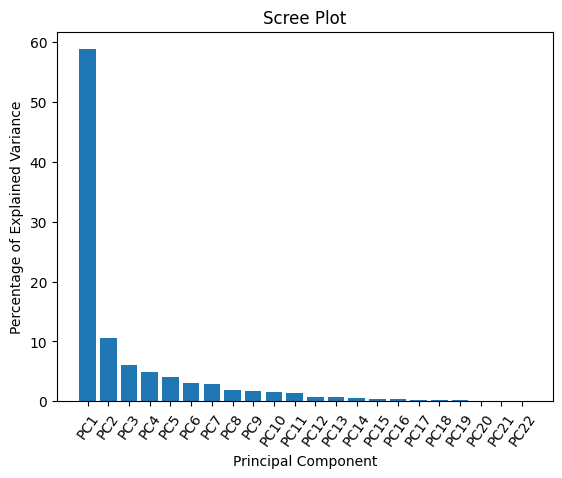

In [ ]:
per_var = np.round(pca1.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=55)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:


# Define the number of components you want to keep
n_components = 3  # Choose the number of principal components

# Initialize PCA object
pca = PCA(n_components=n_components)

# Apply PCA to the standardized data
principal_components = pca.fit_transform(standardized_climate_data)

# Step 5: Analyze Results
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", ", ".join(["{:.2f}%".format(val * 100) for val in explained_variance_ratio]))

# Access the principal components (optional)
principal_components_df = pd.DataFrame(data=principal_components,
                                       columns=['PC1', 'PC2','PC3'])

Explained Variance Ratio: 58.78%, 10.54%, 5.95%


In [ ]:
#principal_components_df.head()

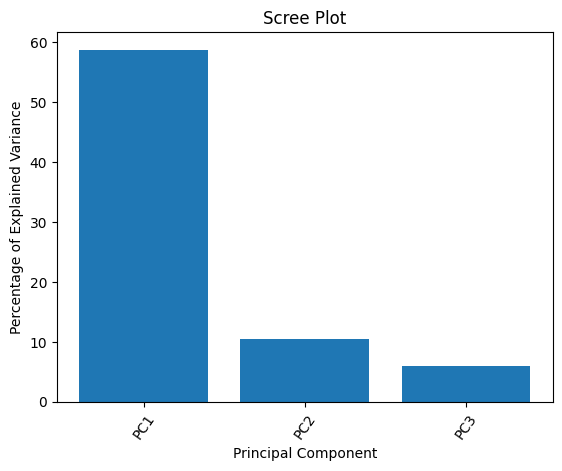

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=55)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

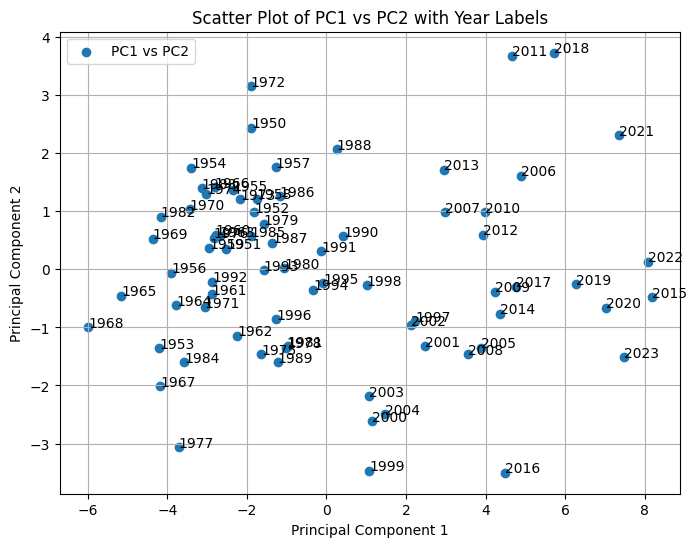

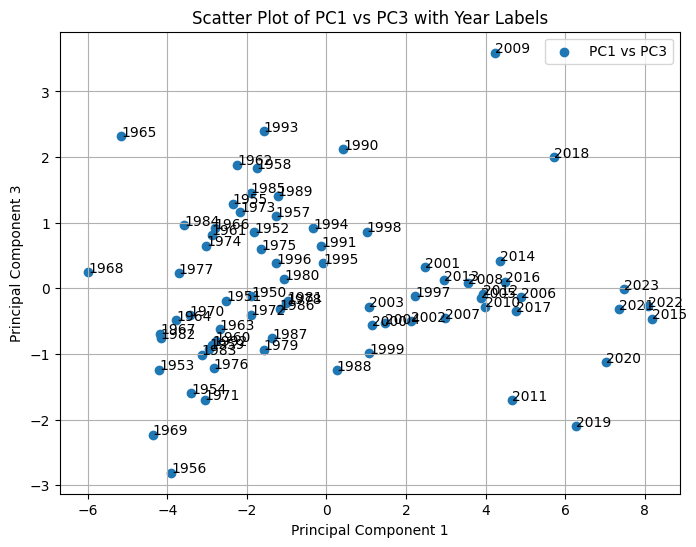

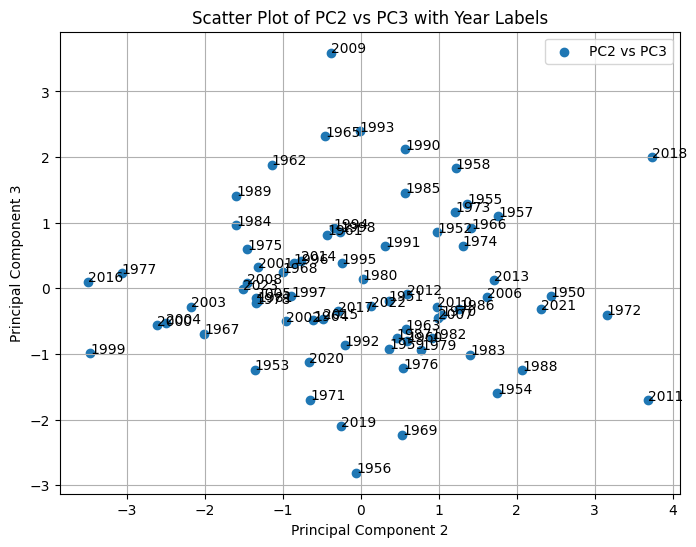

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of PC1 vs PC2 with labels
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_df['PC1'], principal_components_df['PC2'], label='PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PC1 vs PC2 with Year Labels')
plt.legend()
plt.grid(True)

# Label points with year only
for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(principal_components_df['PC1'][i], principal_components_df['PC2'][i], str(year_only))

plt.show()

# Scatter plot of PC1 vs PC3 with labels
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_df['PC1'], principal_components_df['PC3'], label='PC1 vs PC3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('Scatter Plot of PC1 vs PC3 with Year Labels')
plt.legend()
plt.grid(True)

# Label points with year only
for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(principal_components_df['PC1'][i], principal_components_df['PC3'][i], str(year_only))

plt.show()

# Scatter plot of PC2 vs PC3 with labels
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_df['PC2'], principal_components_df['PC3'], label='PC2 vs PC3')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('Scatter Plot of PC2 vs PC3 with Year Labels')
plt.legend()
plt.grid(True)

# Label points with year only
for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(principal_components_df['PC2'][i], principal_components_df['PC3'][i], str(year_only))

plt.show()

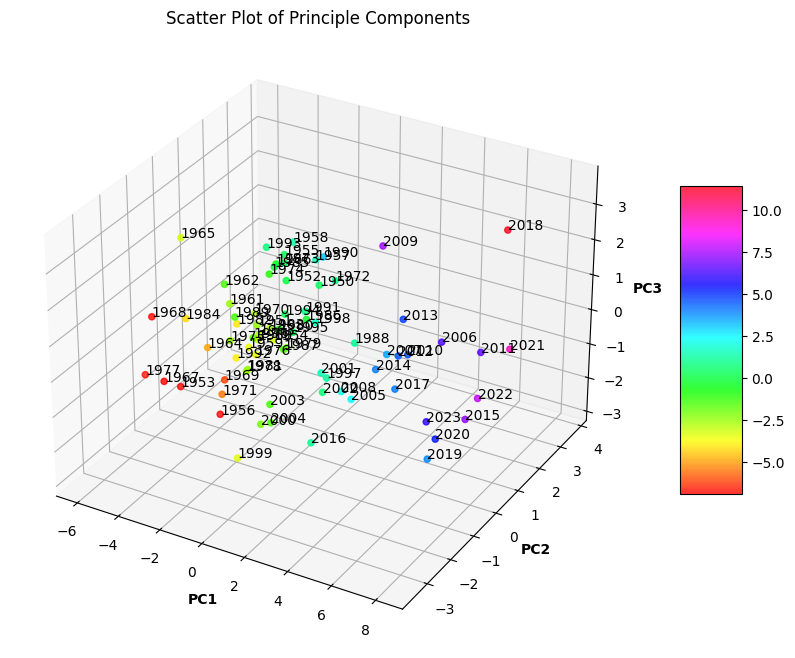

In [ ]:

fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
x = principal_components_df['PC1']
y = principal_components_df['PC2']
z = principal_components_df['PC3']
scatter = ax.scatter3D(x, y, z, alpha=0.8, c = ( x + y + z), cmap = my_cmap)
for i, (xi, yi, zi) in enumerate(zip(x, y, z)):
    year = climatedata_pca.index[i].year
    ax.text(xi, yi, zi, str(year), color='black')
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
fig.colorbar(scatter, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Scatter Plot of Principle Components')

plt.show()

In [ ]:
# Get the loading scores (principal components)
loading_scores = pca.components_

# Get the absolute loading scores for better interpretation
abs_loading_scores = np.abs(loading_scores)

# Exclude 'time' from the top measurements
top_10_indices_PC1 = abs_loading_scores[0].argsort()[-10:][::-1]
top_10_indices_PC2 = abs_loading_scores[1].argsort()[-10:][::-1]
top_10_indices_PC3 = abs_loading_scores[2].argsort()[-10:][::-1]

# Remove 'time' from the top indices
top_10_indices_PC1 = [idx for idx in top_10_indices_PC1 if climatedata_pca.columns[idx] != 'time']
top_10_indices_PC2 = [idx for idx in top_10_indices_PC2 if climatedata_pca.columns[idx] != 'time']
top_10_indices_PC3 = [idx for idx in top_10_indices_PC3 if climatedata_pca.columns[idx] != 'time']

# Get the top 10 measurements contributing to PC1, PC2, and PC3
top_10_measurements_PC1 = climatedata_pca.columns[top_10_indices_PC1][:10]
top_10_measurements_PC2 = climatedata_pca.columns[top_10_indices_PC2][:10]
top_10_measurements_PC3 = climatedata_pca.columns[top_10_indices_PC3][:10]

# Get the contribution of each measurement to PC1, PC2, and PC3
contributions_PC1 = abs_loading_scores[0, top_10_indices_PC1][:10]
contributions_PC2 = abs_loading_scores[1, top_10_indices_PC2][:10]
contributions_PC3 = abs_loading_scores[2, top_10_indices_PC3][:10]

print("Top 10 measurements contributing to PC1:")
for measurement, contribution in zip(top_10_measurements_PC1, contributions_PC1):
    print(f"{measurement}: {contribution * 100:.2f}%")

print("\nTop 10 measurements contributing to PC2:")
for measurement, contribution in zip(top_10_measurements_PC2, contributions_PC2):
    print(f"{measurement}: {contribution * 100:.2f}%")

print("\nTop 10 measurements contributing to PC3:")
for measurement, contribution in zip(top_10_measurements_PC3, contributions_PC3):
    print(f"{measurement}: {contribution * 100:.2f}%")


Top 10 measurements contributing to PC1:
mintemp: 27.07%
meantemp: 27.02%
growthof5degrees: 26.99%
maxtemp: 26.95%
daysover25: 25.90%
daystminover22: 25.86%
daysover30: 25.27%
frostfreeseason: 24.84%
daysover32: 24.78%
coldestday: 24.75%

Top 10 measurements contributing to PC2:
totalrain: 42.56%
rainover1mm: 39.06%
periodsover5drydays: 38.16%
max5daytotalrain: 33.88%
rainover10mm: 30.26%
rainover20mm: 27.80%
max1daytotalrain: 25.71%
maxconsecdrydays: 19.90%
daysover32: 17.68%
hottestday: 17.20%

Top 10 measurements contributing to PC3:
max1daytotalrain: 52.81%
rainover1mm: 46.38%
maxconsecdrydays: 41.64%
max5daytotalrain: 35.58%
rainover20mm: 27.42%
periodsover5drydays: 19.57%
coldestday: 15.05%
rainover10mm: 9.93%
lastspringfrost: 8.65%
daysunderneg15: 8.63%


In [ ]:
# Calculate the squared loading scores for each year and PC
squared_loading_scores = pca.transform(standardized_climate_data) ** 2

# Calculate the contribution for each PC separately
contribution_PC1 = squared_loading_scores[:, 0]
contribution_PC2 = squared_loading_scores[:, 1]
contribution_PC3 = squared_loading_scores[:, 2]

# Get the indices of the top 10 years contributing the most to each PC
top_10_indices_PC1 = contribution_PC1.argsort()[-10:][::-1]  # For PC1
top_10_indices_PC2 = contribution_PC2.argsort()[-10:][::-1]  # For PC2
top_10_indices_PC3 = contribution_PC3.argsort()[-10:][::-1]  # For PC3

# Get the years corresponding to the top 10 indices for each PC
top_10_years_PC1 = climatedata_filtered.index[top_10_indices_PC1]
top_10_years_PC2 = climatedata_filtered.index[top_10_indices_PC2]
top_10_years_PC3 = climatedata_filtered.index[top_10_indices_PC3]

# Top 10 years contributing the most to PC1
print("Top 10 years contributing the most to PC1:")
for idx in top_10_indices_PC1:
    print(climatedata_pca.index[idx].date())

# Top 10 years contributing the most to PC2
print("\nTop 10 years contributing the most to PC2:")
for idx in top_10_indices_PC2:
    print(climatedata_pca.index[idx].date())

# Top 10 years contributing the most to PC3
print("\nTop 10 years contributing the most to PC3:")
for idx in top_10_indices_PC3:
    print(climatedata_pca.index[idx].date())

Top 10 years contributing the most to PC1:
2015-01-01
2022-01-01
2023-01-01
2021-01-01
2020-01-01
2019-01-01
1968-01-01
2018-01-01
1965-01-01
2006-01-01

Top 10 years contributing the most to PC2:
2018-01-01
2011-01-01
2016-01-01
1999-01-01
1972-01-01
1977-01-01
2000-01-01
2004-01-01
1950-01-01
2021-01-01

Top 10 years contributing the most to PC3:
2009-01-01
1956-01-01
1993-01-01
1965-01-01
1969-01-01
1990-01-01
2019-01-01
2018-01-01
1962-01-01
1958-01-01


Demonstration of Standardizing Data with 2 Random Columns

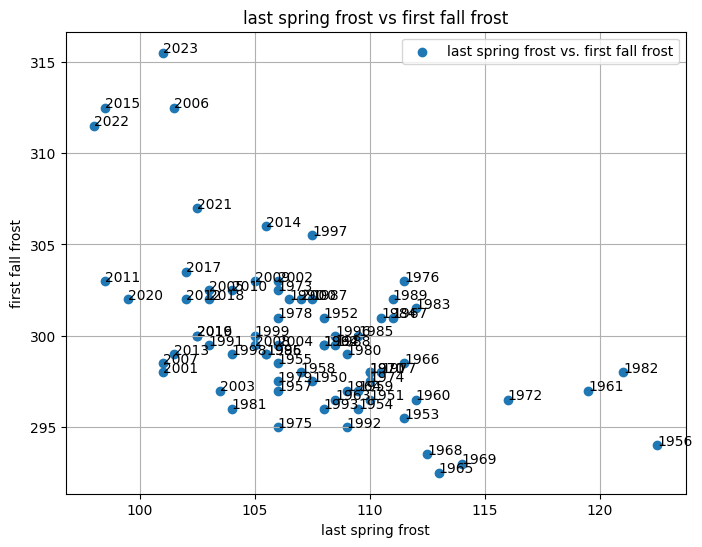

In [ ]:
col1 = climatedata_pca['lastspringfrost']
col2 = climatedata_pca['firstfallfrost']
plt.figure(figsize=(8, 6))
plt.scatter(col1, col2, label='last spring frost vs. first fall frost')
plt.xlabel('last spring frost')
plt.ylabel('first fall frost')
plt.title('last spring frost vs first fall frost')
plt.legend()
plt.grid(True)

for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(climatedata_pca['lastspringfrost'][i], climatedata_pca['firstfallfrost'][i], str(year_only))

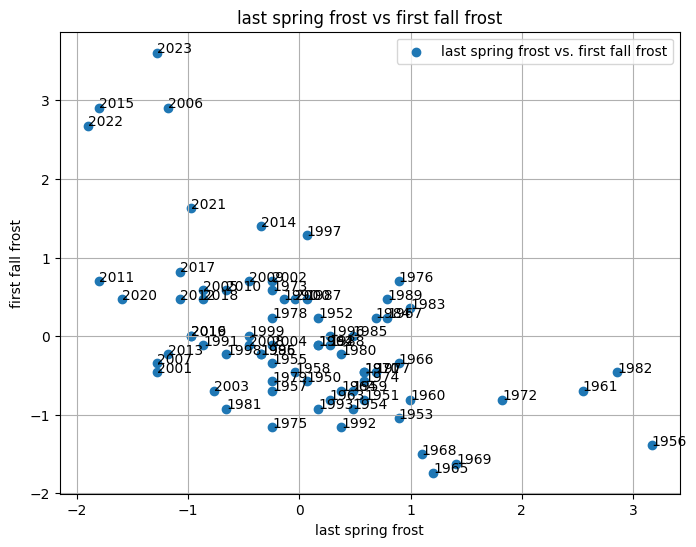

In [ ]:
col1 = climatedata_pca['lastspringfrost']
col2 = climatedata_pca['firstfallfrost']
stdcol1 = standardize_data(col1)
stdcol2 = standardize_data(col2)
plt.figure(figsize=(8, 6))
plt.scatter(stdcol1, stdcol2, label='last spring frost vs. first fall frost')
plt.xlabel('last spring frost')
plt.ylabel('first fall frost')
plt.title('last spring frost vs first fall frost')
plt.legend()
plt.grid(True)

for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(stdcol1[i], stdcol2[i], str(year_only))

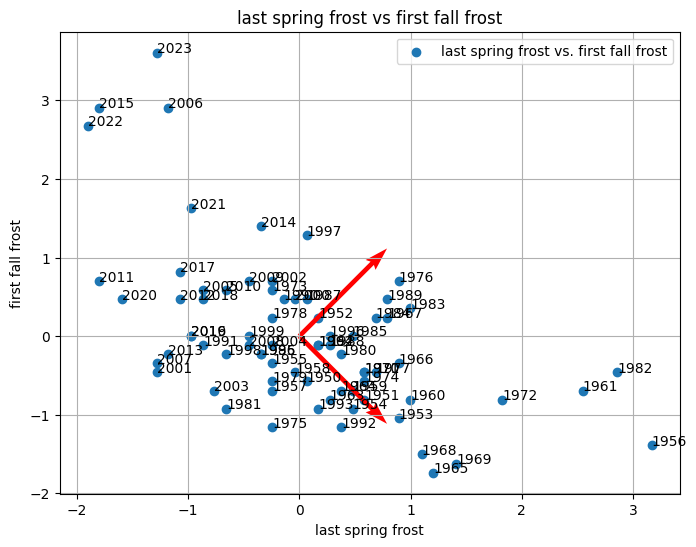

In [ ]:
# Compute covariance matrix
cov_matrix = np.cov(stdcol1, stdcol2)

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose the top k eigenvectors
k = 2  # Since we want both orthogonal eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :k]

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(stdcol1, stdcol2, label='last spring frost vs. first fall frost')
plt.xlabel('last spring frost')
plt.ylabel('first fall frost')
plt.title('last spring frost vs first fall frost')
plt.legend()
plt.grid(True)

# Plot eigenvectors
mean_stdcol1 = np.mean(stdcol1)
mean_stdcol2 = np.mean(stdcol2)
for i in range(top_eigenvectors.shape[1]):
    plt.quiver(mean_stdcol1, mean_stdcol2, top_eigenvectors[0, i], top_eigenvectors[1, i], scale=5, color='r')

# Add text labels
for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(stdcol1[i], stdcol2[i], str(year_only))

plt.show()




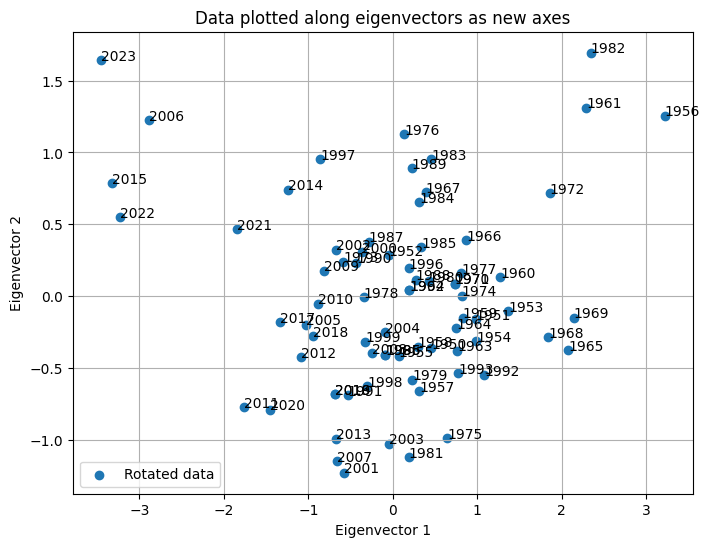

In [ ]:
# Use eigenvectors as new axes
rotated_data = np.dot(np.vstack((stdcol1, stdcol2)).T, sorted_eigenvectors)

# Plot rotated data points
plt.figure(figsize=(8, 6))
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], label='Rotated data')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title('Data plotted along eigenvectors as new axes')
plt.legend()
plt.grid(True)

# Add text labels
for i, time in enumerate(climatedata_filtered['time']):
    year_only = time.year  # Extract year part
    plt.text(rotated_data[:, 0][i], rotated_data[:, 1][i], str(year_only))

plt.show()

Full Manual Implementation

In [ ]:
column_averages = {}
for column in df.columns:
    column_averages[column] = df[column].mean()

# Print the averages of each column
for column, average in column_averages.items():
    print(f'Average of {column}: {average}')

NameError: name 'df' is not defined

In [ ]:
column_deviations = {}
for column in df.columns:
    column_deviations[column] = df[column].std()

# Print the standard deviations of each column
for column, std in column_deviations.items():
    print(f'Standard Deviation of {column}: {std}')

In [ ]:
normalized_df
transposed_df = normalized_df.transpose()

In [ ]:
normalized_df = (df - df.mean()) / df.std()

NameError: name 'df' is not defined

In [ ]:
covariancematrix = 1/(cols-1)*(normalized_df @ transposed_df)
covariancematrix


NameError: name 'cols' is not defined